# **Data Science Projects: COVID-19 and Health Insights**

This combined project performs a comprehensive analysis of health-related data with a primary focus on COVID-19 trends in Canada and the broader context of global health research. The project leverages multiple datasets to explore various aspects of COVID-19, including its spread, mortality rate, and the effectiveness of different medications, while also analyzing the broader public health trends in epidemics and other respiratory infections.

Datasets

1. **COVID-19 Data in Canada**: Contains information on daily reported COVID-19 cases and deaths across Canadian provinces, sourced from the Government of Canada Public Health Infobase. This dataset allows for the analysis of COVID-19 cases, deaths, and per capita rates over time, as well as provincial comparisons. I use data on COVID-19 infected individuals provided by the Government of Canada's Public Health Infobase - Data on COVID-19 in Canada. Source: https://open.canada.ca/data/en/dataset/261c32ab-4cfd-4f81-9dea-7b64065690dc

2. **Medications and Diagnoses**: Focuses on the occurrence of medications and diagnoses mentioned in COVID-19-related abstracts. This dataset contains information about treatments (e.g., hydroxychloroquine, azithromycin) and diagnoses (e.g., COVID-19, pneumonia) in scientific research papers, providing insights into the focus of medical research during the pandemic. Source: COVID-19 Research Articles Dataset. Size: 29,500 articles.

# Analyzing COVID Spread

This code is performing an exploratory data analysis (EDA) and visualization on a COVID-19 dataset to better understand the trends in the number of COVID-19 cases, deaths, and recoveries across different provinces or regions. The project aims to analyze and visualize the COVID-19 situation across various provinces or regions, focusing on:

1. The number of reported COVID-19 cases, deaths, and recoveries over time.
2. Mortality rates and infection rates per province.
3. Identifying trends such as the highest and lowest number of cases or deaths, and overall statistics like the mortality rate across Canada.
4. Handling missing data, outliers, and ensuring clean data for analysis.

#### Dataset

I use data on COVID-19 infected individuals provided by the Government of Canada's Public Health Infobase - Data on COVID-19 in Canada. Source: https://open.canada.ca/data/en/dataset/261c32ab-4cfd-4f81-9dea-7b64065690dc

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Reading Data

In [2]:
# Load the dataset
df = pd.read_csv('covid19-download.csv')
df.head()

,pruid,prname,prnameFR,date,reporting_week,reporting_year,update,totalcases,numtotal_last7,ratecases_total,...,ratecases_last7,ratedeaths_last7,numtotal_last14,numdeaths_last14,ratetotal_last14,ratedeaths_last14,avgcases_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,59,British Columbia,Colombie-Britannique,2020-02-08,6,2020,1.0,4,3,0.07,...,0.05,0.0,4,0.0,0.07,0.0,0.43,0.01,0.0,0.0
1,48,Alberta,Alberta,2020-02-08,6,2020,1.0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0
2,47,Saskatchewan,Saskatchewan,2020-02-08,6,2020,1.0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0
3,46,Manitoba,Manitoba,2020-02-08,6,2020,1.0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0
4,35,Ontario,Ontario,2020-02-08,6,2020,1.0,4,1,0.03,...,0.01,0.0,1,0.0,0.01,0.0,0.14,0,0.0,0.0


In [3]:
# Display basic dataset information
print("\nDataset Description:\n", df.describe())


Dataset Description:
              pruid  reporting_week  reporting_year       update     numdeaths  \
count  3615.000000     3615.000000     3615.000000  3133.000000   3615.000000   
mean     39.200000       25.946058     2021.908714     0.858602   4895.237621   
std      26.287218       14.550301        1.354436     0.348487  10921.498719   
min       1.000000        1.000000     2020.000000     0.000000      0.000000   
25%      12.000000       14.000000     2021.000000     1.000000      7.000000   
50%      46.000000       26.000000     2022.000000     1.000000    345.000000   
75%      60.000000       38.000000     2023.000000     1.000000   3805.500000   
max      99.000000       53.000000     2024.000000     1.000000  60769.000000   

       numdeaths_last7   ratedeaths  ratedeaths_last7  numdeaths_last14  \
count      3082.000000  3374.000000       2841.000000       3099.000000   
mean         39.296561    65.562587          0.568244         78.138432   
std         108.495337

In [4]:
# Display basic dataset information
print("\nDataset Description:\n", df.describe())
print("\nDataset Information:")
df.info()


Dataset Description:
              pruid  reporting_week  reporting_year       update     numdeaths  \
count  3615.000000     3615.000000     3615.000000  3133.000000   3615.000000   
mean     39.200000       25.946058     2021.908714     0.858602   4895.237621   
std      26.287218       14.550301        1.354436     0.348487  10921.498719   
min       1.000000        1.000000     2020.000000     0.000000      0.000000   
25%      12.000000       14.000000     2021.000000     1.000000      7.000000   
50%      46.000000       26.000000     2022.000000     1.000000    345.000000   
75%      60.000000       38.000000     2023.000000     1.000000   3805.500000   
max      99.000000       53.000000     2024.000000     1.000000  60769.000000   

       numdeaths_last7   ratedeaths  ratedeaths_last7  numdeaths_last14  \
count      3082.000000  3374.000000       2841.000000       3099.000000   
mean         39.296561    65.562587          0.568244         78.138432   
std         108.495337

### 3. Data Exploration

Explore the dataset to better understand its characteristics, structure, content and data types.

In [5]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Find all unique values in the 'prname' column
unique_prnames = df['prname'].unique()
print("\nUnique Provinces:\n", unique_prnames)


Missing Values:
 pruid                    0
prname                   0
prnameFR                 0
date                     0
reporting_week           0
reporting_year           0
update                 482
totalcases               0
numtotal_last7         379
ratecases_total        225
numdeaths                0
numdeaths_last7        533
ratedeaths             241
ratecases_last7        604
ratedeaths_last7       774
numtotal_last14        373
numdeaths_last14       516
ratetotal_last14       598
ratedeaths_last14      757
avgcases_last7         379
avgincidence_last7     604
avgdeaths_last7        533
avgratedeaths_last7    774
dtype: int64

Unique Provinces:
 ['British Columbia' 'Alberta' 'Saskatchewan' 'Manitoba' 'Ontario' 'Quebec'
 'Newfoundland and Labrador' 'New Brunswick' 'Nova Scotia'
 'Prince Edward Island' 'Yukon' 'Northwest Territories' 'Nunavut'
 'Repatriated travellers' 'Canada']


### 4. Data Preparation

In [6]:
# Automatically identify object columns with numeric values
object_cols = df.select_dtypes(include='object').columns
cols_to_convert = [col for col in object_cols if df[col].str.isnumeric().any()]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create 'year' and 'month' columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Fill missing values for numeric columns using interpolation (linear method)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].interpolate(method='linear', limit_direction='both')

# Fill remaining missing values for numeric columns with forward fill (ffill)
df[numeric_cols] = df[numeric_cols].fillna(method='ffill')

# Fill missing values for categorical columns with the most frequent value (mode)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Confirm missing values have been handled
print("\nMissing Values After Cleaning:\n", df.isnull().sum())

# Remove records with 'Canada' in the 'prname' column
df = df[df['prname'] != 'Canada']

# Remove outliers using Z-score method for numeric columns
from scipy.stats import zscore
z_scores = df[numeric_cols].apply(zscore)
df = df[(np.abs(z_scores) < 3).all(axis=1)]


Missing Values After Cleaning:
 pruid                  0
prname                 0
prnameFR               0
date                   0
reporting_week         0
reporting_year         0
update                 0
totalcases             0
numtotal_last7         0
ratecases_total        0
numdeaths              0
numdeaths_last7        0
ratedeaths             0
ratecases_last7        0
ratedeaths_last7       0
numtotal_last14        0
numdeaths_last14       0
ratetotal_last14       0
ratedeaths_last14      0
avgcases_last7         0
avgincidence_last7     0
avgdeaths_last7        0
avgratedeaths_last7    0
year                   0
month                  0
dtype: int64


C:\Users\milto\AppData\Local\Temp\ipykernel_29560\1966010450.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[numeric_cols] = df[numeric_cols].fillna(method='ffill')
C:\Users\milto\AppData\Local\Temp\ipykernel_29560\1966010450.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


### 5. Data Analysis

In [8]:
df.describe()

,pruid,date,reporting_week,reporting_year,update,totalcases,numtotal_last7,ratecases_total,numdeaths,numdeaths_last7,...,numtotal_last14,numdeaths_last14,ratetotal_last14,ratedeaths_last14,avgcases_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,year,month
count,2752.000000,2752,2752.000000,2752.000000,2752.000000,2.752000e+03,2752.000000,2752.000000,2752.000000,2752.000000,...,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000
mean,43.861555,2022-03-09 00:27:12.558139648,26.318314,2021.682413,0.856468,1.517504e+05,940.429618,6684.959700,1868.192587,11.993340,...,1877.220409,23.917490,83.945745,0.858437,134.346715,5.991215,1.713199,0.060623,2021.689680,6.469113
min,10.000000,2020-02-08 00:00:00,1.000000,2020.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.000000,...,0.000000,-1.000000,0.000000,-0.080000,0.000000,0.000000,-0.140000,-0.010000,2020.000000,1.000000
25%,13.000000,2021-02-13 00:00:00,14.000000,2021.000000,1.000000,3.707500e+02,5.000000,258.675000,4.000000,0.000000,...,11.000000,0.000000,8.912500,0.059000,0.745000,0.620000,0.000000,0.000000,2021.000000,4.000000
50%,47.000000,2022-03-12 00:00:00,26.000000,2022.000000,1.000000,1.151100e+04,83.100000,6945.830000,94.000000,1.000000,...,164.500000,3.000000,29.235000,0.520000,11.882000,2.080000,0.185000,0.030000,2022.000000,6.000000
75%,60.000000,2023-04-01 00:00:00,39.000000,2023.000000,1.000000,1.501575e+05,610.250000,10804.257500,2002.000000,13.000000,...,1233.250000,26.000000,97.012500,1.320000,87.162500,6.962500,1.860000,0.090000,2023.000000,9.000000
max,99.000000,2024-05-25 00:00:00,53.000000,2024.000000,1.000000,1.635959e+06,14745.000000,30314.700000,17413.000000,155.000000,...,33689.000000,323.000000,1064.520000,5.570000,2106.430000,78.730000,22.140000,0.410000,2024.000000,12.000000
std,25.540854,NaN,14.562905,1.273621,0.337652,3.057872e+05,2134.154763,6439.119819,3670.080325,22.992693,...,4260.624567,46.214503,142.948259,0.996231,304.879263,10.338525,3.284618,0.073943,1.269699,3.340017


### Insights

- Maximum Total Cases: ~1.6 million.
- Maximum Total Deaths: ~17,413.

**Timeline Comparison for Each Region (Infected, Recovered, and Deaths)**

C:\Users\milto\AppData\Local\Temp\ipykernel_29560\974413827.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='date', y='totalcases', hue='prname', palette='tab20', ci=None)


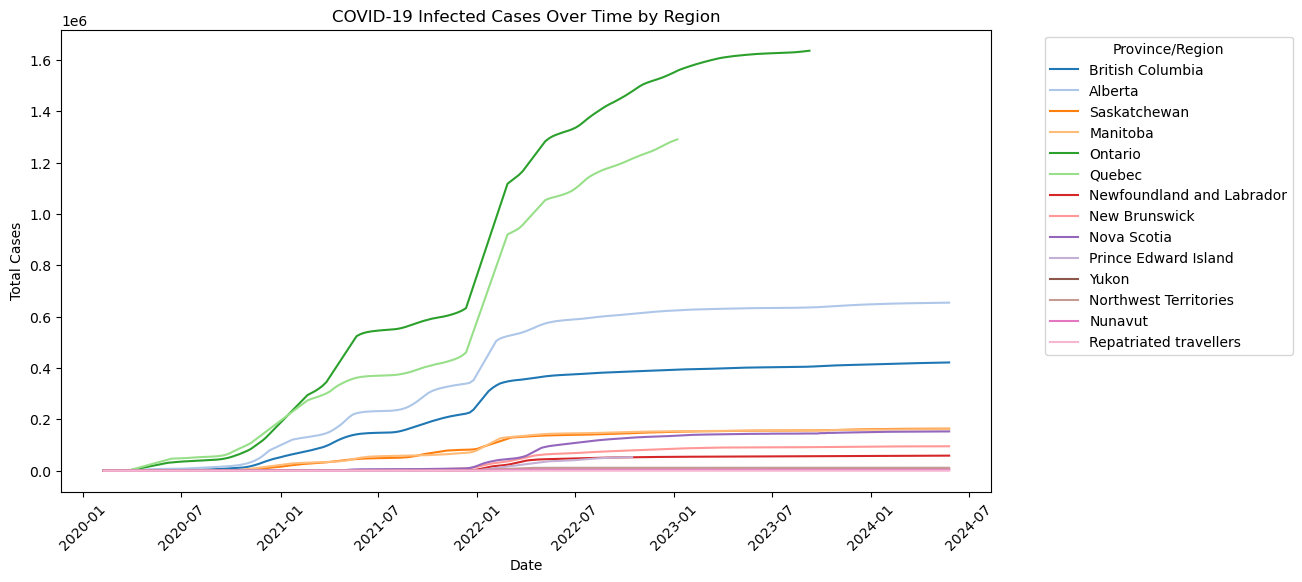

C:\Users\milto\AppData\Local\Temp\ipykernel_29560\974413827.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='date', y='numdeaths_last7', hue='prname', palette='tab20', ci=None)


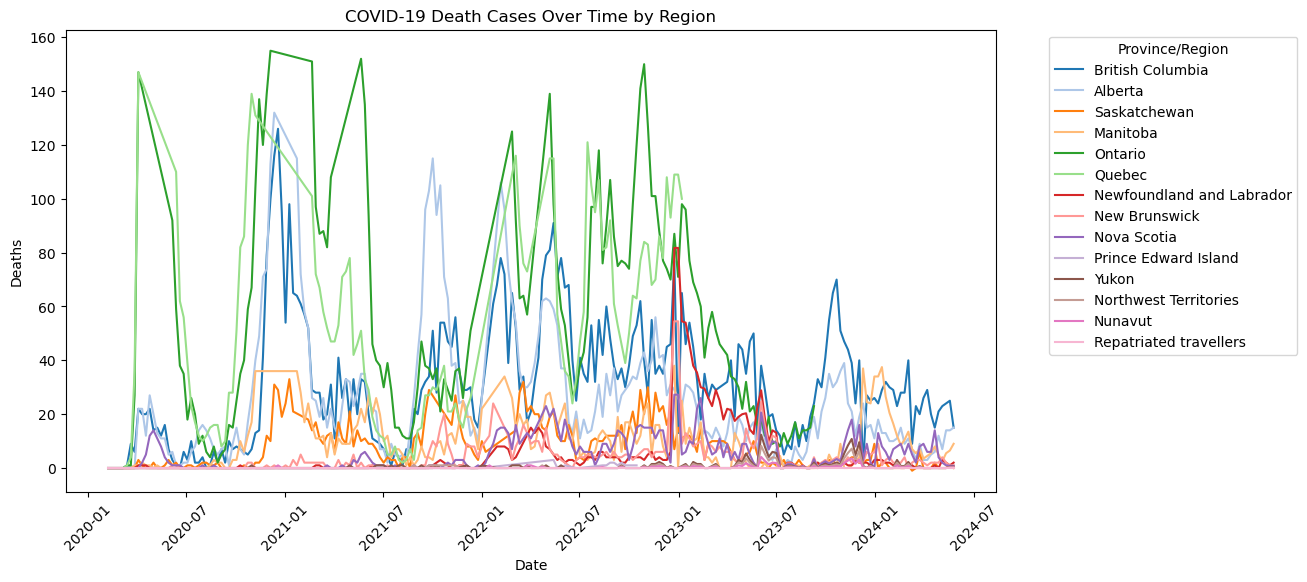

In [9]:
# Create time series for each region
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='totalcases', hue='prname', palette='tab20', ci=None)
plt.title('COVID-19 Infected Cases Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(title='Province/Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# You can repeat this for recovered and death cases
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='numdeaths_last7', hue='prname', palette='tab20', ci=None)
plt.title('COVID-19 Death Cases Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend(title='Province/Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Total number of COVID-19 cases reported in each province
total_cases_per_province = df.groupby('prname')['totalcases'].sum().reset_index()
total_cases_per_province.columns = ['Province', 'Total Cases']
print("\nTotal COVID-19 Cases by Province:\n", total_cases_per_province)

# Average rate of COVID-19 cases per capita for each province
average_rate_per_province = df.groupby('prname')['ratecases_total'].mean().dropna()
print("\nAverage Rate of COVID-19 Cases per Capita by Province:\n", average_rate_per_province)

# Province with the highest average rate of COVID-19 cases per capita
if not average_rate_per_province.empty:
    highest_avg_province = average_rate_per_province.idxmax()
    highest_avg_value = average_rate_per_province.max()
    print(f"\n{highest_avg_province} had the highest average rate of {highest_avg_value:.2f} cases per capita.")

# Average rate of COVID-19 deaths per capita by province
average_death_rate_per_province = df.groupby('prname')['ratedeaths'].mean()
print("\nAverage Rate of COVID-19 Deaths per Capita by Province:\n", average_death_rate_per_province)

# Overall mortality rate of COVID-19 in Canada
total_cases = df['totalcases'].sum()
total_deaths = df['numdeaths'].sum()
if total_cases > 0:
    overall_mortality_rate = (total_deaths / total_cases) * 100
    print(f"\nOverall Mortality Rate of COVID-19 in Canada: {overall_mortality_rate:.2f}%")

# Mortality rate per province
province_totals = df.groupby('prname')[['totalcases', 'numdeaths']].sum()
province_totals['mortality_rate'] = (province_totals['numdeaths'] / province_totals['totalcases']) * 100
print("\nMortality Rate per Province:\n", province_totals)

# Total reported cases per year
total_cases_per_year = df.groupby('year')['totalcases'].sum()
print("\nTotal Reported Cases Per Year:\n", total_cases_per_year)

# Month with the highest total cases for each year
cases_per_year_month = df.groupby(['year', 'month'])['totalcases'].sum().reset_index()
max_cases_per_year = cases_per_year_month.loc[cases_per_year_month.groupby('year')['totalcases'].idxmax()]
print("\nMonth with the Highest Total Cases for Each Year:\n", max_cases_per_year)

# Month with the lowest total cases for each year
min_cases_per_year = cases_per_year_month.loc[cases_per_year_month.groupby('year')['totalcases'].idxmin()]
print("\nMonth with the Lowest Total Cases for Each Year:\n", min_cases_per_year)

# Yearly mortality rate
yearly_data = df.groupby('year').agg(total_deaths=('numdeaths', 'sum'),
                                     total_cases=('totalcases', 'sum')).reset_index()
yearly_data['mortality_rate'] = (yearly_data['total_deaths'] / yearly_data['total_cases']) * 100
print("\nYearly Mortality Rate:\n", yearly_data[['year', 'mortality_rate']])

# Day with highest number of COVID-19 deaths for Quebec in 2020
quebec_2020 = df[(df['prname'] == 'Quebec') & (df['year'] == 2020)]
if not quebec_2020.empty:
    day_with_highest_deaths = quebec_2020.loc[quebec_2020['numdeaths'].idxmax()]
    print("\nDay with the Highest Number of COVID-19 Deaths for Quebec in 2020:\n", day_with_highest_deaths)


Total COVID-19 Cases by Province:
                      Province  Total Cases
0                     Alberta   86939352.0
1            British Columbia   56289744.0
2                    Manitoba   20696001.0
3               New Brunswick    9826582.0
4   Newfoundland and Labrador    6310975.0
5       Northwest Territories    1278151.0
6                 Nova Scotia   15842845.0
7                     Nunavut     432273.0
8                     Ontario  134082722.0
9        Prince Edward Island     755737.0
10                     Quebec   64326116.0
11     Repatriated travellers       2849.0
12               Saskatchewan   20243044.0
13                      Yukon     590727.0

Average Rate of COVID-19 Cases per Capita by Province:
 prname
Alberta                       8612.228047
British Columbia              4594.252928
Manitoba                      6838.948750
New Brunswick                 5400.329771
Newfoundland and Labrador     5350.347215
Northwest Territories        13931.884461
Nov

#### Findings

- Northwest Territories experienced the highest per capita rate of cases, potentially due to its small population size.
- Manitoba had the highest mortality rate, while Prince Edward Island had the lowest.
- 2022 saw the peak in total cases, but mortality rates have generally decreased over the years.
- October was the peak month for cases in most years, possibly due to seasonal patterns or the emergence of new waves of COVID-19.

### 6. Visualizations

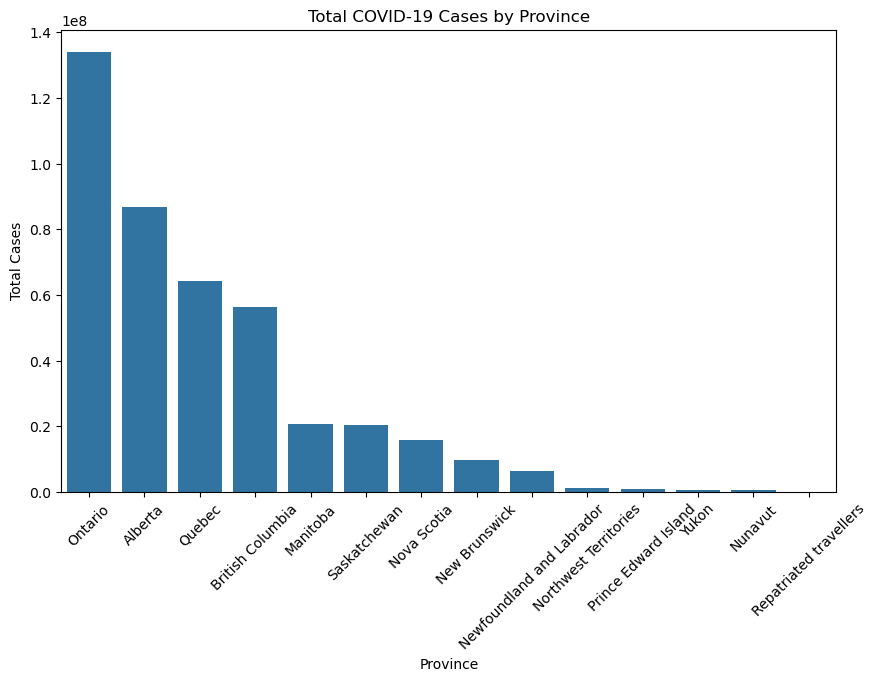

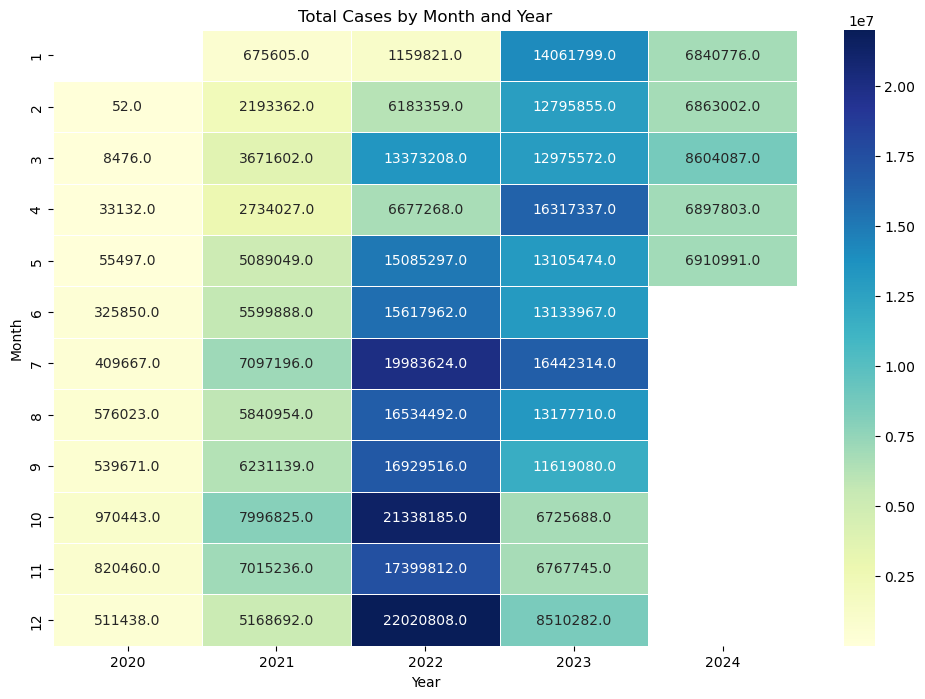

In [11]:
# Visualization: Total cases per province
plt.figure(figsize=(10, 6))
sns.barplot(x='Province', y='Total Cases', data=total_cases_per_province.sort_values(by='Total Cases', ascending=False))
plt.title('Total COVID-19 Cases by Province')
plt.xticks(rotation=45)
plt.ylabel('Total Cases')
plt.show()

# Heatmap: Cases per year and month
heatmap_data = cases_per_year_month.pivot(index='month', columns='year', values='totalcases')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title('Total Cases by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

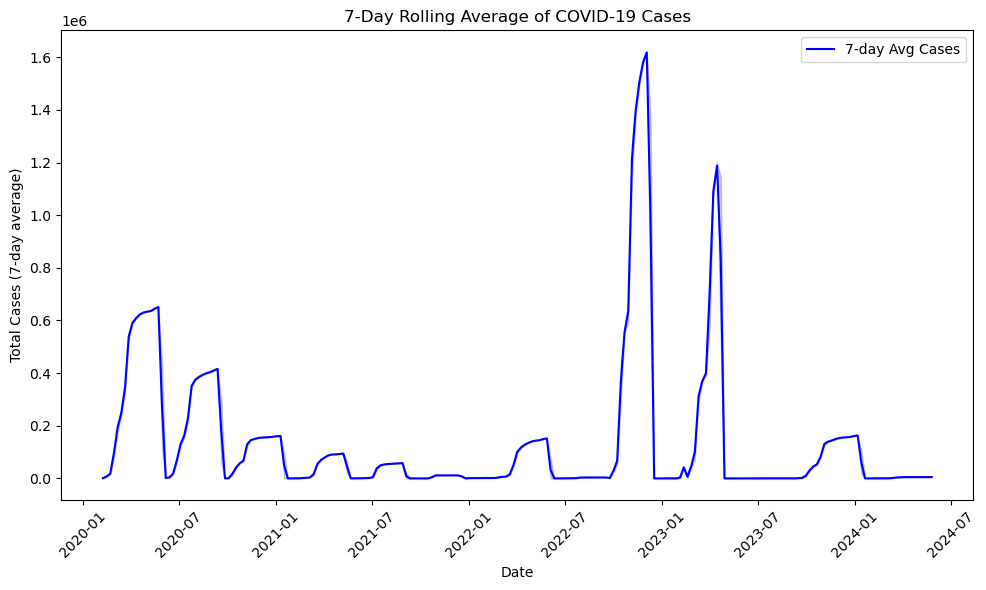

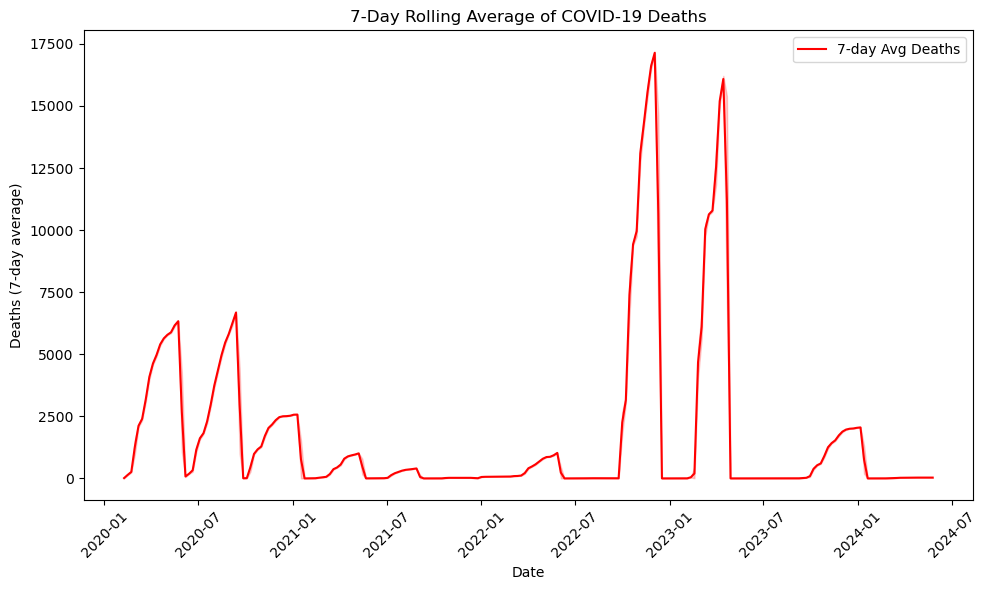

In [12]:
# Check if 'numrecovered' exists in the dataset
if 'numrecovered' in df.columns:
    # Group by date and province, and sum the total cases, deaths, and recoveries for each day
    df_grouped = df.groupby(['date', 'prname'])[['totalcases', 'numdeaths', 'numrecovered']].sum().reset_index()
else:
    # If 'numrecovered' doesn't exist, group only by cases and deaths
    df_grouped = df.groupby(['date', 'prname'])[['totalcases', 'numdeaths']].sum().reset_index()

# Create rolling averages (7-day window for smoothing)
df_grouped['totalcases_rolling'] = df_grouped.groupby('prname')['totalcases'].rolling(window=7, min_periods=1).mean().reset_index(drop=True)
df_grouped['numdeaths_rolling'] = df_grouped.groupby('prname')['numdeaths'].rolling(window=7, min_periods=1).mean().reset_index(drop=True)

# If 'numrecovered' exists, create its rolling average
if 'numrecovered' in df_grouped.columns:
    df_grouped['numrecovered_rolling'] = df_grouped.groupby('prname')['numrecovered'].rolling(window=7, min_periods=1).mean().reset_index(drop=True)

# Plot for Total Cases (7-day rolling average)
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='totalcases_rolling', data=df_grouped, label='7-day Avg Cases', color='blue')
plt.title('7-Day Rolling Average of COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Total Cases (7-day average)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Deaths (7-day rolling average)
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='numdeaths_rolling', data=df_grouped, label='7-day Avg Deaths', color='red')
plt.title('7-Day Rolling Average of COVID-19 Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths (7-day average)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Recoveries (7-day rolling average) if 'numrecovered' exists
if 'numrecovered_rolling' in df_grouped.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='date', y='numrecovered_rolling', data=df_grouped, label='7-day Avg Recoveries', color='green')
    plt.title('7-Day Rolling Average of COVID-19 Recoveries')
    plt.xlabel('Date')
    plt.ylabel('Recoveries (7-day average)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


We can see high fluctuations in data.

## Conclusion

The analysis reveals significant regional disparities, with provinces like Ontario and Alberta experiencing the highest total cases, while others like Nunavut report far fewer cases. Additionally, the data shows that the Northwest Territories had the highest rate of COVID-19 cases per capita, while Manitoba recorded the highest mortality rate.

The trends over time indicate that although the total number of cases spiked significantly in 2022, the mortality rate has generally decreased year over year, reflecting potential improvements in treatment and healthcare responses. Notably, October stands out as the month with the highest reported cases in most years, suggesting seasonal fluctuations in the virus's spread.

Overall, the analysis emphasizes the varying impact of COVID-19 across provinces and highlights important temporal and regional patterns. The findings set the stage for deeper research into the underlying factors driving these disparities, including healthcare infrastructure, population density, and public health measures.

# Analyzing COVID-19 Papers

**This project applies various NLP techniques such as tokenization, stopword removal, topic modeling, sentiment analysis, and visualization to extract valuable insights from a large collection of COVID-19 research articles.** 

This project provides a comprehensive analysis of over 29,500 research articles related to COVID-19, utilizing advanced Natural Language Processing (NLP) techniques to extract valuable insights from the data. Through the application of keyword counting, topic modeling, and sentiment analysis, the project explores key research trends and topics in COVID-19 studies, with a particular focus on medications, diagnoses, and their relationships to the ongoing pandemic.

#### Dataset

- Source: COVID-19 Research Articles Dataset.
- Size: 29,500 articles.

**Key Features**:

- Title: Research paper title.
- Abstract: Summary of the research (used for NLP tasks).
- Publish Time: Date of publication.
- Journal: Journal where the article was published.
- Authors: List of authors.

### 1. Import Libraries

In [13]:
import os
import zipfile
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from textblob import TextBlob

### 2. Loading the Dataset

In [15]:
# Unzipping and loading the dataset
zip_file_path = 'Research Articles.zip'
dataset_path = './Research_Articles'

if not os.path.exists(dataset_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(dataset_path)
    print(f"Unzipped the dataset to: {dataset_path}")
else:
    print(f"Dataset already extracted at: {dataset_path}")

# Load the CSV file
file_path = os.path.join(dataset_path, 'data.csv')
df = pd.read_csv(file_path)
print(f"Dataset loaded with shape: {df.shape}")

# Display the first few rows to inspect the data
df.head()

Unzipped the dataset to: ./Research_Articles
Dataset loaded with shape: (29500, 14)


,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text
0,c630ebcdf30652f0422c3ec12a00b50241dc9bd9,CZI,Angiotensin-converting enzyme 2 (ACE2) as a SA...,10.1007/s00134-020-05985-9,NaN,32125455.0,cc-by-nc,NaN,2020,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med,2.002765e+09,#3252,True
1,53eccda7977a31e3d0f565c884da036b1e85438e,CZI,Comparative genetic analysis of the novel coro...,10.1038/s41421-020-0147-1,NaN,NaN,cc-by,NaN,2020,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery,3.003431e+09,#1861,True
2,210a892deb1c61577f6fba58505fd65356ce6636,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,NaN,NaN,cc-by,The geographic spread of 2019 novel coronaviru...,2020,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,3.006065e+09,#1043,True
3,e3b40cc8e0e137c416b4a2273a4dca94ae8178cc,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,NaN,32093211.0,cc-by,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,1.776631e+08,#1999,True
4,92c2c9839304b4f2bc1276d41b1aa885d8b364fd,CZI,Imaging changes in severe COVID-19 pneumonia,10.1007/s00134-020-05976-w,NaN,32125453.0,cc-by-nc,NaN,2020,"Zhang, Wei",Intensive Care Med,3.006643e+09,#3242,False


### 3. Data Preprocessing

In [16]:
# Load the data (assuming the CSV is already loaded in df)
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')  # Handle errors if any

# Ensure there are no missing values in the abstract column
df['abstract'] = df['abstract'].fillna('')

# Verify the publish_time format and filter
print(df[(df['publish_time'] >= "2020-01-01") & (df['publish_time'] <= "2021-07-31")]['publish_time'].head())

0   2020-01-01
1   2020-01-01
2   2020-01-01
3   2020-01-01
4   2020-01-01
Name: publish_time, dtype: datetime64[ns]


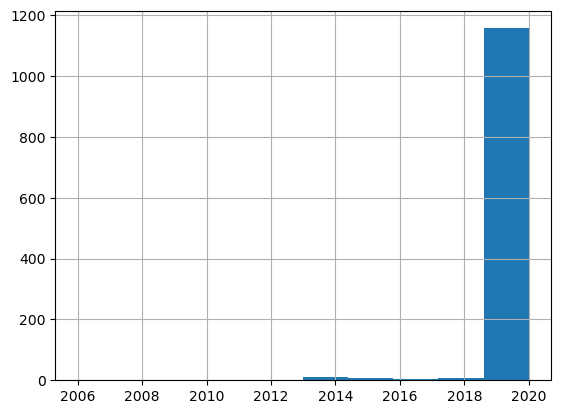

In [17]:
# Load the data (assuming the CSV is already loaded in df)
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')  # Handle errors if any

# Plot the histogram of publish times
df['publish_time'].hist()
plt.show()

Interestingly, there are coronavirus-related papers that date back to 2006!

### 4. Exploratory Data Analysis (EDA)

**Let's look for things.**

To begin with, I manually added a list of possible medications used to treat COVID, and also the list of diagnoses. I then go over them and search corresponding terms in the abstracts of papers.

#### Analysis of Medications and Diagnoses

The code looks for mentions of specific medications (e.g., hydroxychloroquine, remdesivir) and diagnoses (e.g., COVID, pneumonia) within the article abstracts.

The count_medicatiopn function iterates through a list of medications (e.g., hydroxychloroquine, chloroquine, etc.), applying the count_medication function to each abstract in the df['abstract'] column. The function count_medication uses regular expressions to search for exact matches of each medication name (as whole words) in the abstract text. It then counts how many times the medication appears in the abstract.

In [18]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

import re

def count_medication(text, medication):
    # Use word boundaries to ensure the medication name is matched as a whole word
    pattern = r'\b' + re.escape(medication) + r'\b'
    return len(re.findall(pattern, str(text).lower()))

# Apply this function to count medications in abstracts
for m in medications:
    print(f" + Processing medication: {m}")
    df[m] = df['abstract'].apply(lambda x: count_medication(x, m))
    
for m in diagnosis:
    print(f" + Processing diagnosis: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))

 + Processing medication: hydroxychloroquine
 + Processing medication: chloroquine
 + Processing medication: tocilizumab
 + Processing medication: remdesivir
 + Processing medication: azithromycin
 + Processing medication: lopinavir
 + Processing medication: ritonavir
 + Processing medication: dexamethasone
 + Processing medication: heparin
 + Processing medication: favipiravir
 + Processing medication: methylprednisolone
 + Processing diagnosis: covid
 + Processing diagnosis: sars
 + Processing diagnosis: pneumonia
 + Processing diagnosis: infection
 + Processing diagnosis: diabetes
 + Processing diagnosis: coronavirus
 + Processing diagnosis: death


We have added a bunch of columns to our dataframe that contain number of times a given medicine/diagnosis is present in the abstract.

To make working with data easier, we can extract the sub-frame with only medication counts, and compute the accumulated number of occurrences. This gives is the most popular medication:

In [19]:
dfm = df[medications]
dfm = dfm.sum().reset_index().rename(columns={ 'index' : 'Name', 0 : 'Count'})
dfm.sort_values('Count',ascending=False)

,Name,Count
1,chloroquine,158
6,ritonavir,60
5,lopinavir,58
8,heparin,57
10,methylprednisolone,48
7,dexamethasone,47
4,azithromycin,44
3,remdesivir,33
9,favipiravir,13
0,hydroxychloroquine,6


We can see the number of times the names of the medications appeared in the research papers.

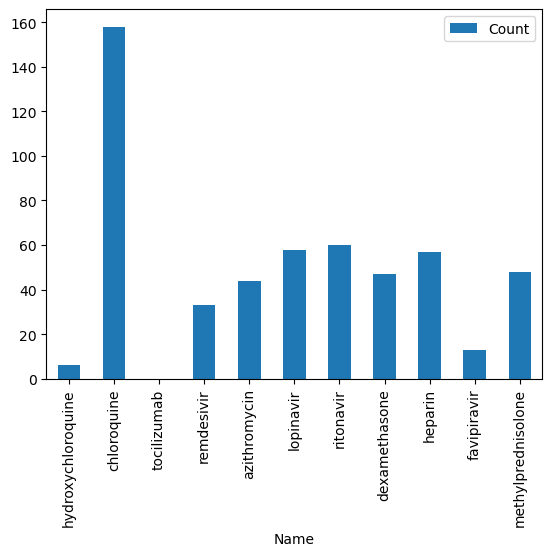

In [20]:
dfm.set_index('Name').plot(kind='bar')
plt.show()

#### (1) Analysis of Abstract Length

A distribution of abstract lengths (in terms of word count) is plotted to understand how long the abstracts generally are.

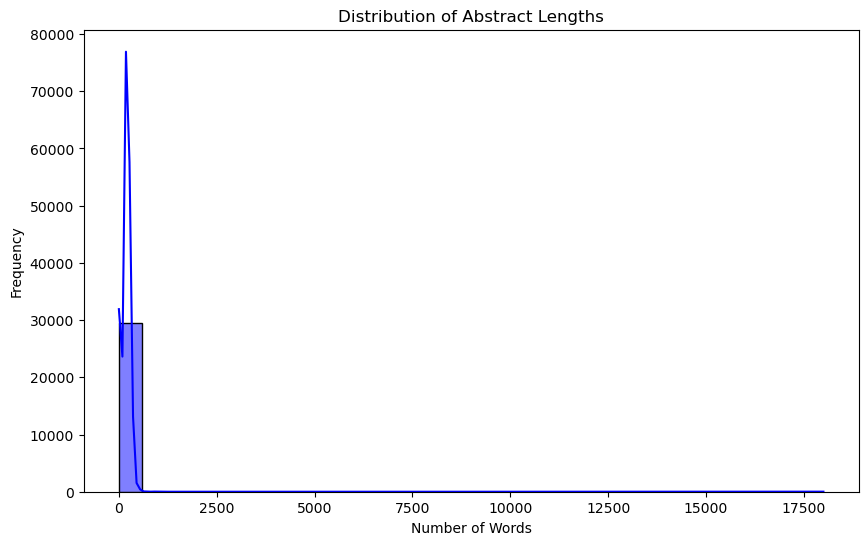

In [22]:
# Check Abstract Length Distribution
df['abstract_length'] = df['abstract'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['abstract_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Abstract Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

#### (2) Top Sources and Journals

The code analyzes and visualizes the top 10 sources (research platforms) and journals that publish COVID-19 research articles, based on the article count.

C:\Users\milto\AppData\Local\Temp\ipykernel_29560\1564472489.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sources.index, y=top_sources.values, palette='viridis')


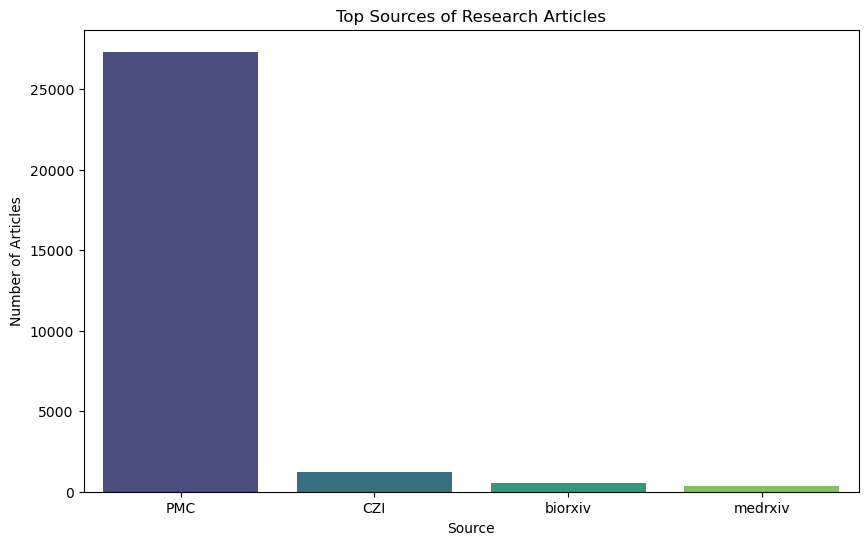

In [24]:
# Top sources
top_sources = df['source_x'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sources.index, y=top_sources.values, palette='viridis')
plt.title('Top Sources of Research Articles')
plt.xlabel('Source')
plt.ylabel('Number of Articles')
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_29560\2905295107.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_journals.index, y=top_journals.values, palette='viridis')


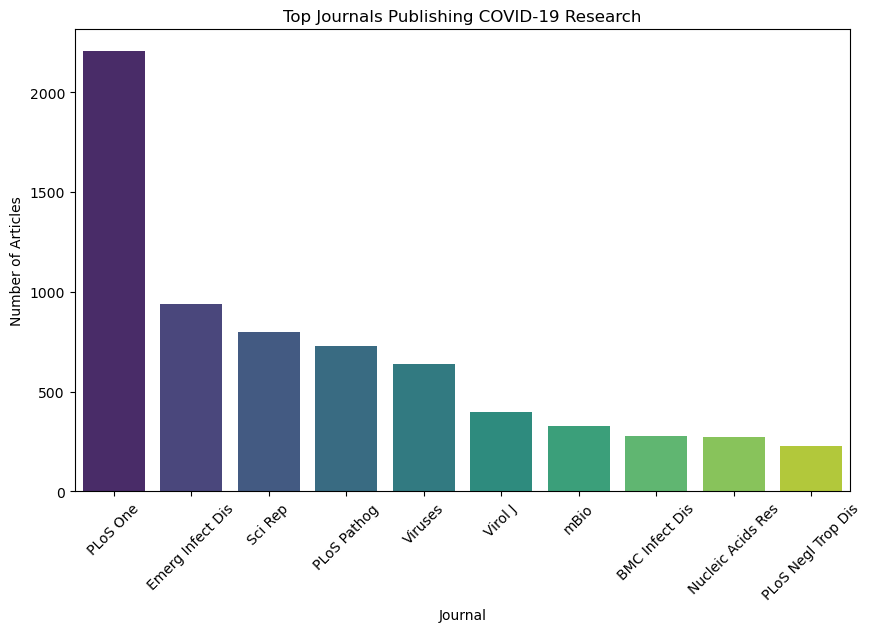

In [25]:
# Top journals
top_journals = df['journal'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_journals.index, y=top_journals.values, palette='viridis')
plt.title('Top Journals Publishing COVID-19 Research')
plt.xlabel('Journal')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

#### (3) Word Cloud Generation

A word cloud is generated to visually represent the most frequent words (excluding stopwords) in the abstracts. This helps to identify common themes and terms in the research articles.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\milto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\milto\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


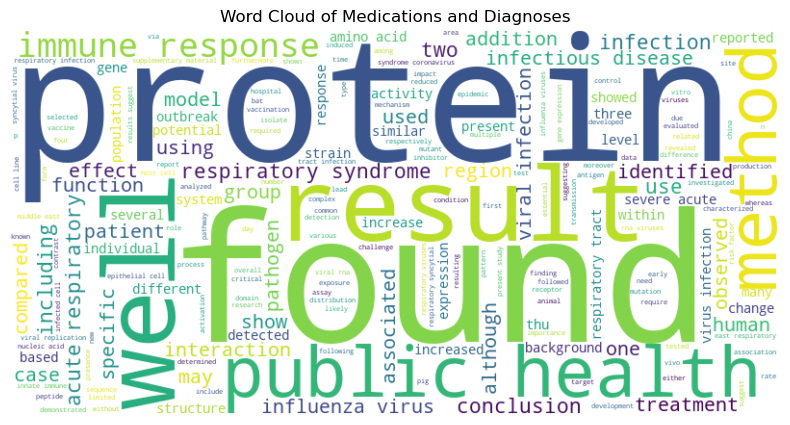

In [26]:
# NLP Analysis

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Define the stop words
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  # Filter non-alphanumeric and stop words
    return ' '.join(tokens)

# Apply preprocessing to your 'abstract' column (assuming df is your DataFrame)
df['cleaned_abstract'] = df['abstract'].apply(preprocess_text)

# Combine all the cleaned abstracts into one string
text = ' '.join(df['cleaned_abstract'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Medications and Diagnoses')
plt.show()

**I wanted to see if a WordCloud would show me what words stood out the most. I can remove one by one to find other term. This more for exploration.**

#### (4) TF-IDF Vectorization

The TfidfVectorizer is used to convert the cleaned abstracts into numerical features based on term frequency and inverse document frequency (TF-IDF). This allows for identifying important words across the dataset.

In [27]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_abstract'])

#### (5) Topic Modeling (LDA)

The Latent Dirichlet Allocation (LDA) model is applied to extract the most common topics from the research abstracts. It identifies groups of words that frequently appear together in the dataset, helping to uncover the key research areas within the COVID-19 literature.

In [28]:
# Latent Dirichlet Allocation (LDA)

from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(tfidf_matrix)

# Display top terms for each topic
terms = tfidf_vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx + 1}:")
    print(", ".join([terms[i] for i in topic.argsort()[-10:]]))

Topic 1:
epidemic, influenza, patients, data, transmission, public, outbreak, disease, cases, health
Topic 2:
detected, clinical, rsv, viruses, influenza, infections, samples, children, patients, respiratory
Topic 3:
nsp12, subgenomic, transcriptional, leader, nsp14, lion, nsp10, bmv, rna, di
Topic 4:
host, immune, expression, mice, protein, viral, cell, virus, infection, cells
Topic 5:
species, sequence, vaccine, genome, human, protein, rna, viral, viruses, virus


### Interpretation

**Topic 1:** Focuses on public health and epidemics. It contains words like "epidemic," "influenza," "patients," "disease," "outbreak," and "health," which suggests that this topic is about the spread of infectious diseases, particularly influenza, and the importance of data related to these diseases in the context of public health.

**Topic 2:** Focuses on respiratory infections in children, especially related to RSV (Respiratory Syncytial Virus) and influenza. Words like "rsv," "viruses," "infections," and "children" suggest this topic covers research or findings related to respiratory infections in pediatric patients.

**Topic 3:** Appears to focus on RNA-related research, specifically viral replication mechanisms. Words like "nsp12," "nsp14," "subgenomic," "transcriptional," and "rna" point to a topic focused on the molecular biology of viral infections, likely related to RNA viruses.

**Topic 4:** Focuses on the immune response to viral infections. Words like "immune," "expression," "protein," "cells," and "infection" suggest this topic covers research about how the immune system responds to viral infections, with a focus on protein expression in cells.

#### (6) Sentiment Analysis

Sentiment analysis is performed on the cleaned abstracts using the TextBlob library. It assigns a polarity score to each abstract, indicating whether the text is positive, neutral, or negative.

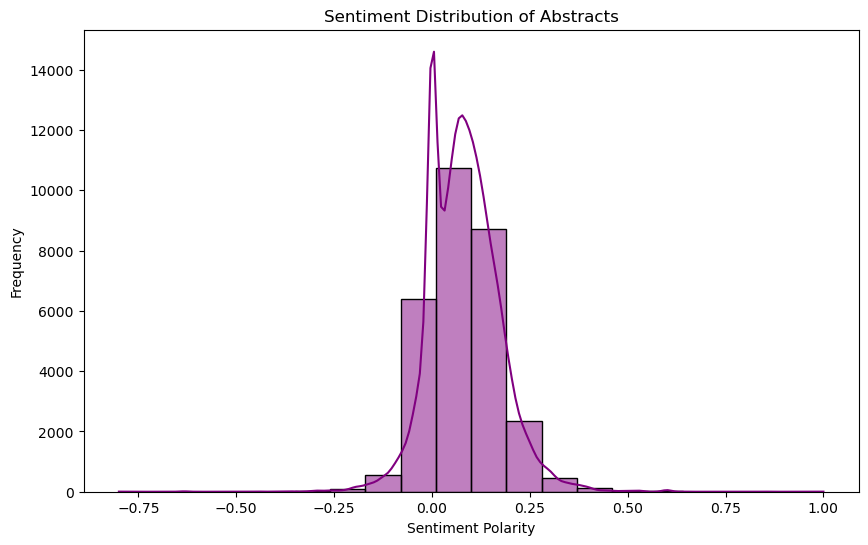

In [30]:
# Sentiment Analysis

def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['cleaned_abstract'].apply(analyze_sentiment)

plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=20, kde=True, color='purple')
plt.title('Sentiment Distribution of Abstracts')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

**The distribution leans towards 1, which suggests that the abstracts are generally positive.**

In [ ]:
# Save cleaned dataset
# cleaned_file_path = os.path.join(dataset_path, 'cleaned_data.csv')
# df.to_csv(cleaned_file_path, index=False)
# print(f"Cleaned dataset saved to: {cleaned_file_path}")

## Conclusion

By leveraging NLP techniques such as keyword analysis, topic modeling, and sentiment analysis, this project can help researchers, policymakers, and healthcare professionals quickly identify the most relevant and impactful topics in the fight against the pandemic. The findings highlight the evolution of treatment focus, the significance of specific diagnoses, and emerging trends in viral research, which can guide future studies and interventions.

#### Key Findings:

- The analysis of medications reveals that chloroquine is the most frequently mentioned treatment, with hydroxychloroquine being the least mentioned, despite its significant media coverage. This highlights the shifting focus within research over time, with medications such as ritonavir and lopinavir also emerging as prominent topics in COVID-19 studies.
- In terms of diagnoses, terms such as covid, pneumonia, and infection dominate the abstracts, underscoring the primary focus on the impact of the COVID-19 virus and related respiratory conditions.

The topic modeling analysis identifies four primary themes in the literature:

- Public health and epidemics: Addressing the spread of infectious diseases, particularly influenza, with a focus on outbreak management and public health responses.
- Respiratory infections in children: Concentrating on RSV and influenza, highlighting the unique challenges in pediatric populations.
- Viral replication and RNA research: Focusing on the molecular biology of RNA viruses, particularly viral replication mechanisms.
- Immune responses to viral infections: Investigating how the immune system reacts to viral threats, with a particular emphasis on protein expression and cellular responses.

The sentiment analysis conducted across abstracts also provides valuable insights into the tone and mood of the research, offering a deeper understanding of the emotional undertones present in the literature. This type of analysis can be crucial for identifying shifts in the research landscape, as well as tracking public perception and the emotional climate surrounding the pandemic.